In [1]:
# numpy handles pretty much anything that is a number/vector/matrix/array
import numpy as np
# pandas handles dataframes
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# stats models is a package that is going to perform the regression analysis
from statsmodels import api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score
# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow INFO and WARNING messages
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools

import IPython.display as ipd
import librosa
import librosa.display
from tqdm import tqdm

import matplotlib.pylab as pltimport 
import seaborn as sns
import keras
import tensorflow as tf
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,classification_report
import librosa
import librosa.display
import IPython.display as ipd
import time
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import pyarrow.parquet as pq
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow.keras.backend as K

#from itertools import cycle

/home/tooloo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2024-05-31 16:50:42.821050: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-31 16:50:44.070490: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Specify the path to your Parquet file
parquet_file = 'Validated_Mean_MFCCs.parquet'

# Open the Parquet file
parquet_fp = pq.ParquetFile(parquet_file)

# Read the entire Parquet file into a pandas DataFrame
df = parquet_fp.read().to_pandas()

print(len(df))


24391


In [3]:
df.head()

,file_name,full_path,accent,client_id,mfcc
0,00107e332adcfd462e6e63672fe2e8c35ecc2a0c080f59...,clips/00107e332adcfd462e6e63672fe2e8c35ecc2a0c...,philippines,7e15eb1a534db8fed74c85f17f826f98811cc78f819699...,"[-556.35876, 97.393524, 29.900265, 11.843604, ..."
1,00119d1a6e0ca409589596515c5d20beba288cabb5de8c...,clips/00119d1a6e0ca409589596515c5d20beba288cab...,african,708a6873077f9f0e6d8152ff3457ec8d16c594bdc7c994...,"[-387.4066, 101.80327, 54.53282, 35.850063, 30..."
2,001634b2624c76335cd5c89732417b90559c9fa0c7424d...,clips/001634b2624c76335cd5c89732417b90559c9fa0...,us,b8e207bf512e18de1f69eb9a4ecdfe6eeb87fc56453134...,"[-573.56824, 57.357796, -16.92593, 23.546545, ..."
3,001b31757745829e0cfffb5a1d1a72e3d0db0cfe867be8...,clips/001b31757745829e0cfffb5a1d1a72e3d0db0cfe...,england,70cdbd11f1ef0ae8a31cd1e03adb394f9c52f81f37d0b1...,"[-325.36502, 36.170784, -12.670762, -1.6950808..."
4,001ee7212affe60a635b8a67a92f022894fe7fc7a1b27a...,clips/001ee7212affe60a635b8a67a92f022894fe7fc7...,ireland,a621e0a56253eca3b11c3df97fa9655ce6fb2a223c7e7a...,"[-614.25885, 53.201412, -9.970491, 24.887451, ..."


In [4]:
df['accent'].unique()

array(['philippines', 'african', 'us', 'england', 'ireland', 'newzealand',
       'bermuda', 'wales', 'indian', 'canada', 'australia', 'other',
       'malaysia', 'scotland', 'hongkong', 'singapore', 'southatlandtic'],
      dtype=object)

In [5]:
X = np.array(df['mfcc'].tolist())
y = np.array(df['accent'].tolist())

In [6]:
print(f"MFCCs shape: {X.shape}")
print(f"Accents shape: {y.shape}")

MFCCs shape: (24391, 50)
Accents shape: (24391,)


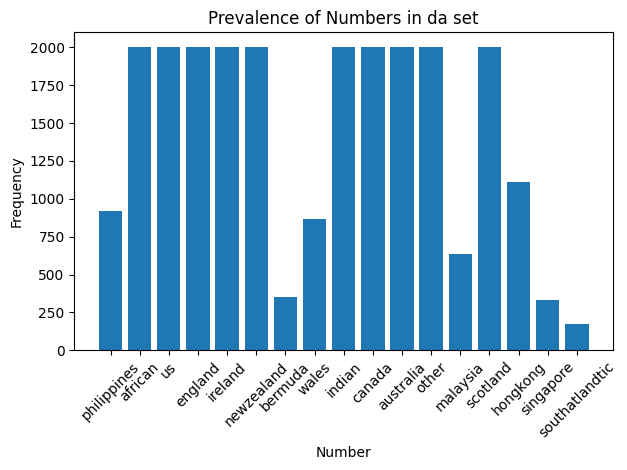

In [7]:
numbers_array = y  # Example array creation

# Count the occurrences of each number
counter_data = Counter(numbers_array)

# Plot the data
plt.bar(counter_data.keys(), counter_data.values())
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Prevalence of Numbers in da set')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [8]:
# Make the labels
labelencoder = LabelEncoder()

y=to_categorical(labelencoder.fit_transform(y))

# Get named labels to use for evaluation later
class_labels = labelencoder.classes_

num_labels = y.shape[1]

In [9]:
# First split: split the original dataset into a training set and a temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# Second split: split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)


In [10]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(17073, 17)
(3659, 17)
(3659, 17)


In [11]:
print("Number of training samples = ", X_train.shape[0])
print("Number of validation samples = ",X_val.shape[0])

Number of training samples =  17073
Number of validation samples =  3659


In [12]:
model = Sequential()
# first layer
model.add(Dense(256, input_shape=(50,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Second layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Third layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Fourth layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/home/tooloo/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-31 16:50:45.984355: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-31 16:50:45.984709: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)               │     13,056 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization             │ (None, 256)               │      1,024 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ activation (Activation)         │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_1           │ (None, 256)               │      1,024 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ activation_1 (Activation)       │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_2           │ (None, 256)               │      1,024 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ activation_2 (Activation)       │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 128)               │     32,896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_3           │ (None, 128)               │        512 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ activation_3 (Activation)       │ (None, 128)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_3 (Dropout)             │ (None, 128)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_4 (Dense)                 │ (None, 17)                │      2,193 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ activation_4 (Activation)       │ (None, 17)                │          0 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 183,313 (716.07 KB)

 Trainable params: 181,521 (709.07 KB)

 Non-trainable params: 1,792 (7.00 KB)

In [14]:
model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam')

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
start = datetime.now()
num_epochs = 400
num_batch_size = 128

In [16]:
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification_400_epochsv2.keras', verbose=1 , save_best_only=True)
training = model.fit(X_train,
                     y_train,
                     batch_size=num_batch_size,
                     epochs=num_epochs,
                     shuffle=True,
                     validation_data=(X_val,y_val), callbacks=[checkpointer])
duration = datetime.now() - start
print("training completed in time: ", duration)

Epoch 1/400
126/134 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0889 - loss: 3.1705
Epoch 1: val_loss improved from inf to 2.76474, saving model to saved_models/audio_classification_400_epochsv2.keras
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0901 - loss: 3.1570 - val_accuracy: 0.1364 - val_loss: 2.7647
Epoch 2/400
127/134 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1541 - loss: 2.6456
Epoch 2: val_loss improved from 2.76474 to 2.26523, saving model to saved_models/audio_classification_400_epochsv2.keras
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1552 - loss: 2.6414 - val_accuracy: 0.2599 - val_loss: 2.2652
Epoch 3/400
132/134 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2123 - loss: 2.4055
Epoch 3: val_loss improved from 2.26523 to 2.10178, saving model to saved_models/audio_classification_400_epochsv2.keras
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2125 - loss: 2.4050 - val_accuracy: 0.3154 - val_loss: 2.1018
Epoch 4/400
131/134 ━━━━━━━━━

In [17]:
val_accuracy = model.evaluate(X_val,y_val,verbose=0)
ypred = model.predict(X_test)
print(ypred)
y_pred_classes = np.argmax(ypred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(val_accuracy[1])

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

# Optionally, you can also evaluate the loss and accuracy on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[3.2370442e-01 1.0560510e-02 7.6551116e-03 ... 1.1461836e-03
  7.7775352e-02 8.7668328e-03]
 [6.0065102e-04 1.8491379e-04 6.9463563e-06 ... 1.2531398e-05
  7.8228384e-04 3.7597729e-05]
 [3.4731533e-03 2.9722230e-05 4.4656626e-05 ... 2.0060059e-05
  8.4148522e-04 2.1089367e-05]
 ...
 [4.7890894e-04 1.0066289e-03 4.2673538e-04 ... 2.9037021e-05
  1.9378519e-02 2.2874645e-05]
 [9.3929583e-01 2.7015058e-03 3.6093386e-04 ... 2.2300912e-05
  1.1223045e-02 3.6763694e-04]
 [2.0757821e-01 4.5384881e-03 1.0771493e-02 ... 8.8430401e-03
  2.1183696e-02 9.1025783e-03]]
0.8270019292831421
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       299
           1       0.94      0.83      0.88       272
           2       0.95      0.75      0.84        55
           3       0.76      0.88      0.81       306
           4       0.77      0.77      0.77       292
           5       0.96     

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                precision    recall  f1-score   support

       african       0.91      0.77      0.83       299
     australia       0.94      0.83      0.88       272
       bermuda       0.95      0.75      0.84        55
        canada       0.76      0.88      0.81       306
       england       0.77      0.77      0.77       292
      hongkong       0.96      0.94      0.95       156
        indian       0.90      0.84      0.87       300
       ireland       0.88      0.92      0.90       298
      malaysia       0.85      0.86      0.86        88
    newzealand       0.91      0.92      0.91       311
         other       0.85      0.80      0.82       283
   philippines       0.89      0.85      0.87       152
      scotland       0.88      0.86      0.87       308
     singapore       1.00      0.67      0.80        52
southatlandtic       0.78      0.78      0.78        23
            us       0.56      0.70      0.62       345
      

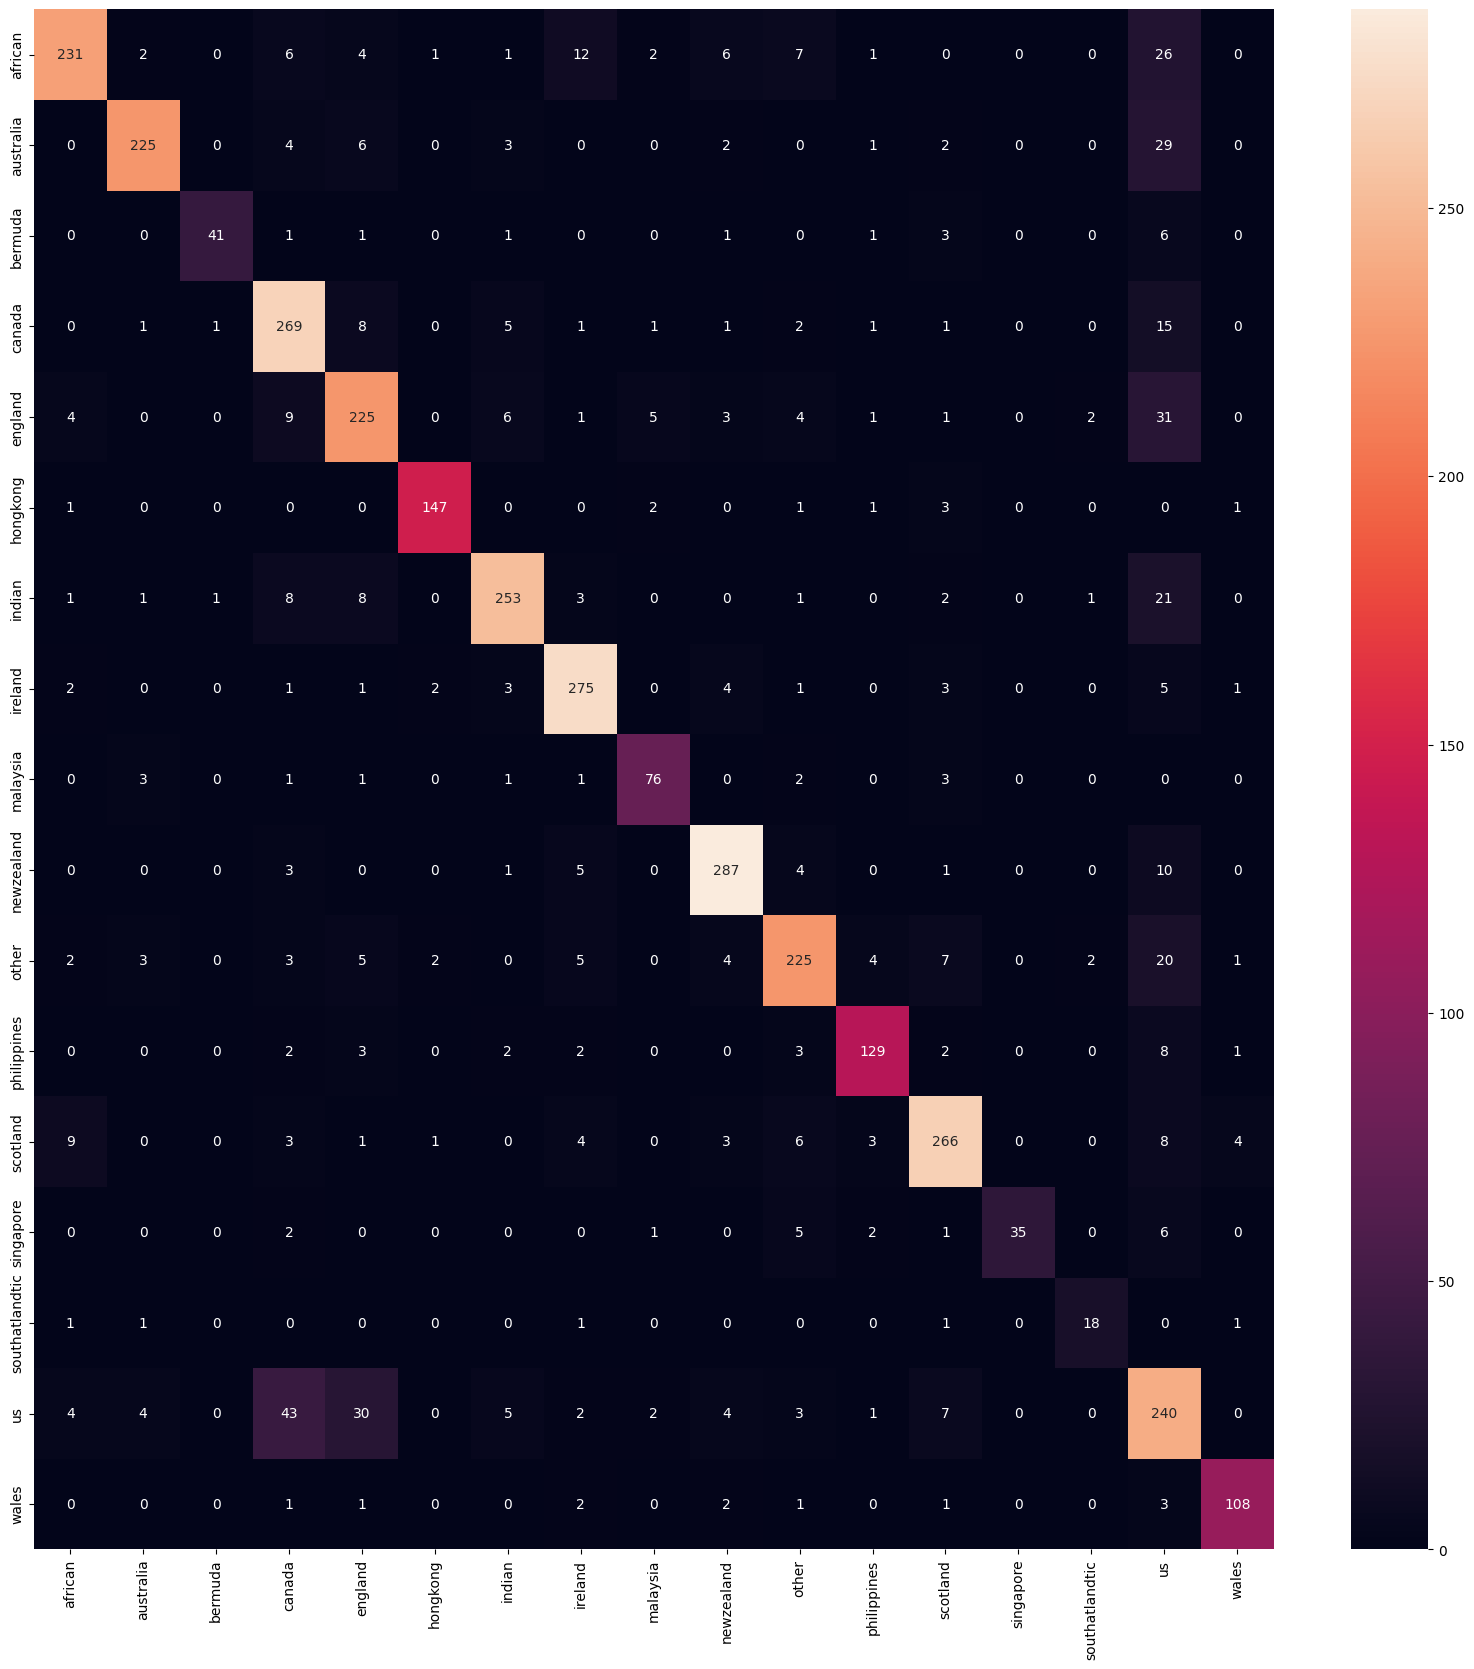

<Figure size 1000x800 with 0 Axes>

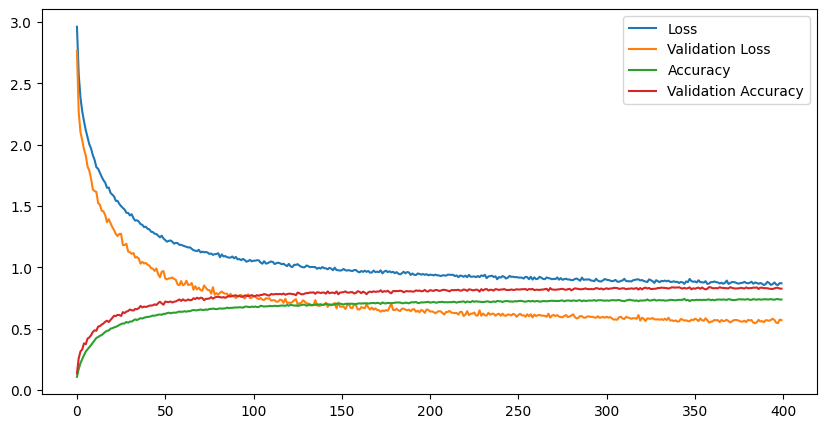

In [18]:
def eval_model(model, history, x_train, y_train, x_test, y_test, class_labels):
    fig = plt.figure(figsize=[20, 20])

    ax = fig.add_subplot(1, 1, 1)
    pred = model.predict(x_test)
    indexes = np.argmax(pred, axis=1)
    gt_idx = np.argmax(y_test, axis=1)

    # Calculate confusion matrix for all labels
    confusion_mtx = confusion_matrix(gt_idx, indexes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mtx, annot=True, fmt='g', ax=ax, xticklabels=class_labels, yticklabels=class_labels)

    fig = plt.figure(figsize=[10, 5])
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(history.history['loss'], label='Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.plot(history.history['accuracy'], label='Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.legend()

    print(classification_report(gt_idx, indexes, target_names=class_labels))

    # Calculate and print average precision, recall, and F1-score
    precision = precision_score(gt_idx, indexes, average='weighted')
    recall = recall_score(gt_idx, indexes, average='weighted')
    f1 = f1_score(gt_idx, indexes, average='weighted')

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')

eval_model(model, training, X_train, y_train, X_test, y_test, class_labels)


In [19]:
train_hist = pd.DataFrame(training.history)
train_hist

,accuracy,loss,val_accuracy,val_loss
0,0.108651,2.961581,0.136376,2.764735
1,0.172260,2.573331,0.259907,2.265228
2,0.220524,2.382481,0.315387,2.101779
3,0.253324,2.271351,0.331785,2.036738
4,0.284953,2.191407,0.381252,1.962540
...,...,...,...,...
395,0.736660,0.877718,0.828642,0.571902
396,0.741522,0.860306,0.834108,0.550212
397,0.741873,0.856574,0.833561,0.545754
398,0.738183,0.872244,0.827275,0.574726


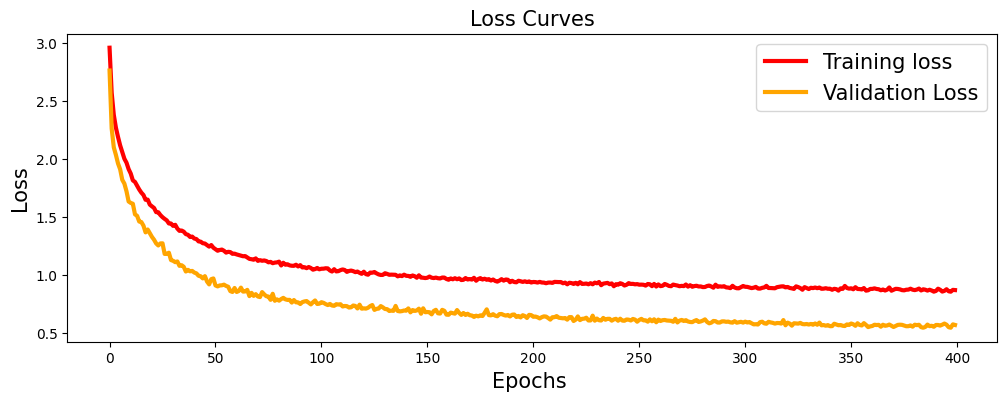

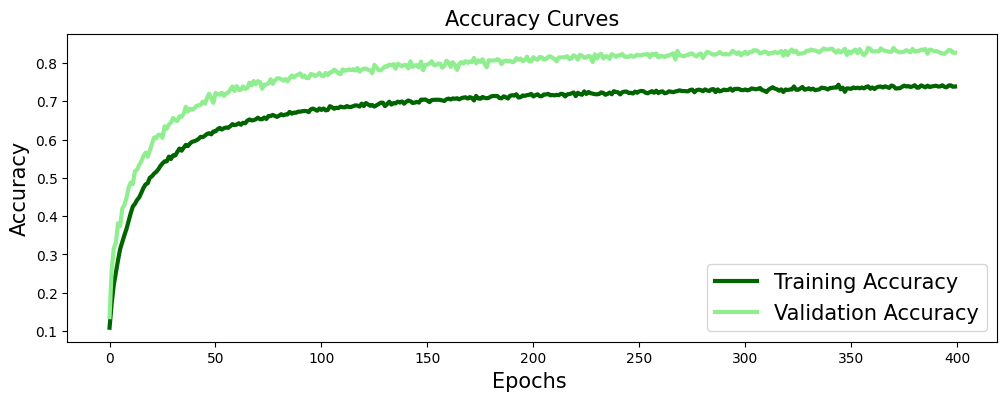

In [20]:
# Loss curves
plt.figure(figsize=[12,4])
plt.plot(training.history['loss'],'red',linewidth=3.0)
plt.plot(training.history['val_loss'],'orange',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=15)
plt.xlabel('Epochs ',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title('Loss Curves',fontsize=15)


# Accuracy Curves
plt.figure(figsize=[12,4])
plt.plot(training.history['accuracy'],'darkgreen',linewidth=3.0)
plt.plot(training.history['val_accuracy'],'lightgreen',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=15)
plt.xlabel('Epochs ',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title('Accuracy Curves',fontsize=15)
plt.show()